In [1]:
import math
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict
from scipy.stats import pearsonr


1) Aprire il file e mostrare le informazioni di base per ognuna delle variabili: numero di valori nulli e tipo della variabile Per ogni riga, le viariabili sono separate da virgola.



In [2]:
df = pd.read_csv('C:/Users/princ/Desktop/Master/ted.csv', sep=',')

In [3]:
df.head()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,1140739200,26,David Pogue,David Pogue: Simplicity sells,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,1140912000,35,Majora Carter,Majora Carter: Greening the ghetto,1,1151367060,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550
4,593,You've never seen data presented like this. Wi...,1190,TED2006,1140566400,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,1151440680,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869


In [4]:
df.info

<bound method DataFrame.info of       comments                                        description  duration  \
0         4553  Sir Ken Robinson makes an entertaining and pro...      1164   
1          265  With the same humor and humanity he exuded in ...       977   
2          124  New York Times columnist David Pogue takes aim...      1286   
3          200  In an emotionally charged talk, MacArthur-winn...      1116   
4          593  You've never seen data presented like this. Wi...      1190   
...        ...                                                ...       ...   
2545        17  Between 2008 and 2016, the United States depor...       476   
2546         6  How can you study Mars without a spaceship? He...       290   
2547        10  Science fiction visions of the future show us ...       651   
2548        32  In an unmissable talk about race and politics ...      1100   
2549         8  With more than half of the world population li...       519   

             event 

In [5]:
df.isna().sum()

comments              0
description           0
duration              0
event                 0
film_date             0
languages             0
main_speaker          0
name                  0
num_speaker           0
published_date        0
ratings               0
related_talks         0
speaker_occupation    6
tags                  0
title                 0
url                   0
views                 0
dtype: int64

2) Ogni presentazione è identificata da un titolo. Associare ad ogni titolo un valore numerico crescente. Salvare la corrispondenza in un dizionario e aggiungere una variabile ai dati con tale identificativo numerico al dataframe originale.

In [6]:
df.title

0                             Do schools kill creativity?
1                             Averting the climate crisis
2                                        Simplicity sells
3                                     Greening the ghetto
4                         The best stats you've ever seen
                              ...                        
2545    What we're missing in the debate about immigra...
2546                      The most Martian place on Earth
2547    What intelligent machines can learn from a sch...
2548         A black man goes undercover in the alt-right
2549    How a video game might help us build better ci...
Name: title, Length: 2550, dtype: object

In [7]:
df['id'] = range(1, len(df) + 1)


In [8]:
title_to_id = df.set_index('title')['id'].to_dict()

In [9]:
df['numeric_id'] = df['title'].map(title_to_id).astype(int)

In [10]:
df[['title', 'numeric_id']].head()

,title,numeric_id
0,Do schools kill creativity?,1
1,Averting the climate crisis,2
2,Simplicity sells,3
3,Greening the ghetto,4
4,The best stats you've ever seen,5


In [11]:
df2= df[df.isnull().any(axis=1)]

3)Una sola variabile presenta valori mancanti. Ne si stampino i possibili valori. Si produca una dataframe che contenga le sole righe con valori mancanti di questa
variabile e si rimuovano tali righe dal dataframe originale.

In [12]:
df['speaker_occupation'].unique()

array(['Author/educator', 'Climate advocate', 'Technology columnist', ...,
       'Historian, philosopher', 'Astrobiologist', ' Robotics engineer'],
      dtype=object)

In [13]:
df[df['speaker_occupation'].isnull()]

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views,id,numeric_id
1113,145,"After a crisis, how can we tell if water is sa...",217,TEDGlobal 2011,1310601600,38,Sonaar Luthra,Sonaar Luthra: Meet the Water Canary,1,1326731605,"[{'id': 10, 'name': 'Inspiring', 'count': 73},...","[{'id': 523, 'hero': 'https://pe.tedcdn.com/im...",NaN,"['TED Fellows', 'design', 'global development'...",Meet the Water Canary,https://www.ted.com/talks/sonaar_luthra_meet_t...,353749,1114,1114
1192,122,"The Pirate Party fights for transparency, anon...",1097,TEDxObserver,1331424000,10,Rick Falkvinge,Rick Falkvinge: I am a pirate,1,1333289675,"[{'id': 8, 'name': 'Informative', 'count': 156...","[{'id': 1329, 'hero': 'https://pe.tedcdn.com/i...",NaN,"['Internet', 'TEDx', 'global issues', 'politic...",I am a pirate,https://www.ted.com/talks/rick_falkvinge_i_am_...,181010,1193,1193
1220,257,"As you surf the Web, information is being coll...",399,TED2012,1330473600,32,Gary Kovacs,Gary Kovacs: Tracking our online trackers,1,1336057219,"[{'id': 23, 'name': 'Jaw-dropping', 'count': 9...","[{'id': 1370, 'hero': 'https://pe.tedcdn.com/i...",NaN,"['Internet', 'advertising', 'business', 'priva...",Tracking our online trackers,https://www.ted.com/talks/gary_kovacs_tracking...,2098639,1221,1221
1656,140,"In this lovely talk, TED Fellow Ryan Holladay ...",389,TED@BCG San Francisco,1383091200,33,Ryan Holladay,Ryan Holladay: To hear this music you have to ...,1,1389369735,"[{'id': 1, 'name': 'Beautiful', 'count': 211},...","[{'id': 1152, 'hero': 'https://pe.tedcdn.com/i...",NaN,"['TED Fellows', 'entertainment', 'music', 'tec...",To hear this music you have to be there. Liter...,https://www.ted.com/talks/ryan_holladay_to_hea...,1284510,1657,1657
1911,48,What do you do with an outdated encyclopedia i...,366,TEDYouth 2014,1415059200,34,Brian Dettmer,Brian Dettmer: Old books reborn as art,1,1423238442,"[{'id': 1, 'name': 'Beautiful', 'count': 361},...","[{'id': 610, 'hero': 'https://pe.tedcdn.com/im...",NaN,"['TEDYouth', 'art', 'books', 'creativity']",Old books reborn as art,https://www.ted.com/talks/brian_dettmer_old_bo...,1159937,1912,1912
1949,70,Photographer Boniface Mwangi wanted to protest...,440,TEDGlobal 2014,1413763200,33,Boniface Mwangi,Boniface Mwangi: The day I stood up alone,1,1427989423,"[{'id': 3, 'name': 'Courageous', 'count': 614}...","[{'id': 1757, 'hero': 'https://pe.tedcdn.com/i...",NaN,"['TED Fellows', 'activism', 'art', 'corruption...",The day I stood up alone,https://www.ted.com/talks/boniface_mwangi_boni...,1342431,1950,1950


In [14]:
mask= df['speaker_occupation'].isnull()

In [15]:
df2=df.drop(df[mask].index)

In [16]:
df2

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views,id,numeric_id
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110,1,1
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520,2,2
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,1140739200,26,David Pogue,David Pogue: Simplicity sells,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292,3,3
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,1140912000,35,Majora Carter,Majora Carter: Greening the ghetto,1,1151367060,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550,4,4
4,593,You've never seen data presented like this. Wi...,1190,TED2006,1140566400,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,1151440680,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2545,17,"Between 2008 and 2016, the United States depor...",476,TED2017,1496707200,4,Duarte Geraldino,Duarte Geraldino: What we're missing in the de...,1,1505851216,"[{'id': 3, 'name': 'Courageous', 'count': 24},...","[{'id': 2596, 'hero': 'https://pe.tedcdn.com/i...",Journalist,"['TED Residency', 'United States', 'community'...",What we're missing in the debate about immigra...,https://www.ted.com/talks/duarte_geraldino_wha...,450430,2546,2546
2546,6,How can you study Mars without a spaceship? He...,290,TED2017,1492992000,3,Armando Azua-Bustos,Armando Azua-Bustos: The most Martian place on...,1,1505919737,"[{'id': 22, 'name': 'Fascinating', 'count': 32...","[{'id': 2491, 'hero': 'https://pe.tedcdn.com/i...",Astrobiologist,"['Mars', 'South America', 'TED Fellows', 'astr...",The most Martian place on Earth,https://www.ted.com/talks/armando_azua_bustos_...,417470,2547,2547
2547,10,Science fiction visions of the future show us ...,651,TED2017,1492992000,1,Radhika Nagpal,Radhika Nagpal: What intelligent machines can ...,1,1506006095,"[{'id': 1, 'name': 'Beautiful', 'count': 14}, ...","[{'id': 2346, 'hero': 'https://pe.tedcdn.com/i...",Robotics engineer,"['AI', 'ants', 'fish', 'future', 'innovation',...",What intelligent machines can learn from a sch...,https://www.ted.com/talks/radhika_nagpal_what_...,375647,2548,2548
2548,32,In an unmissable talk about race and politics ...,1100,TEDxMileHigh,1499472000,1,Theo E.J. Wilson,Theo E.J. Wilson: A black man goes undercover ...,1,1506024042,"[{'id': 11, 'name': 'Longwinded', 'count': 3},...","[{'id': 2512, 'hero': 'https://pe.tedcdn.com/i...",Public intellectual,"['Internet', 'TEDx', 'United States',

#dfnan=df.iloc['speaker_occupation'][axis=1] verificare come si fa con iloc

4.Produrre statistiche descrittive per le variabili numeriche presenti: media, mediana, moda, deviazione standard. Produrre inoltre la matrice di correlazione per le sole variabili numeriche. Quali variabili sono maggiormente correlate tra di loro? Plottare la matrice di correlazione e renderla il più leggibile possibile.

In [17]:
df3= df[['comments', 'duration', 'languages', 'num_speaker', 'views']]

In [18]:
df3.describe()

,comments,duration,languages,num_speaker,views
count,2550.000000,2550.000000,2550.000000,2550.000000,2.550000e+03
mean,191.562353,826.510196,27.326275,1.028235,1.698297e+06
std,282.315223,374.009138,9.563452,0.207705,2.498479e+06
min,2.000000,135.000000,0.000000,1.000000,5.044300e+04
25%,63.000000,577.000000,23.000000,1.000000,7.557928e+05
50%,118.000000,848.000000,28.000000,1.000000,1.124524e+06
75%,221.750000,1046.750000,33.000000,1.000000,1.700760e+06
max,6404.000000,5256.000000,72.000000,5.000000,4.722711e+07


In [19]:
# oppure, Estrarre solo le colonne numeriche, però ritorna anche le colonne senza senso tipo la data
df_numerico = df.select_dtypes(include='number')

In [20]:
df_numerico

,comments,duration,film_date,languages,num_speaker,published_date,views,id,numeric_id
0,4553,1164,1140825600,60,1,1151367060,47227110,1,1
1,265,977,1140825600,43,1,1151367060,3200520,2,2
2,124,1286,1140739200,26,1,1151367060,1636292,3,3
3,200,1116,1140912000,35,1,1151367060,1697550,4,4
4,593,1190,1140566400,48,1,1151440680,12005869,5,5
...,...,...,...,...,...,...,...,...,...
2545,17,476,1496707200,4,1,1505851216,450430,2546,2546
2546,6,290,1492992000,3,1,1505919737,417470,2547,2547
2547,10,651,1492992000,1,1,1506006095,375647,2548,2548
2548,32,1100,1499472000,1,1,1506024042,419309,2549,2549


In [21]:
df3.mean()

comments       1.915624e+02
duration       8.265102e+02
languages      2.732627e+01
num_speaker    1.028235e+00
views          1.698297e+06
dtype: float64

In [22]:
df3.median()

comments           118.0
duration           848.0
languages           28.0
num_speaker          1.0
views          1124523.5
dtype: float64

In [23]:
df3.std()

comments       2.823152e+02
duration       3.740091e+02
languages      9.563452e+00
num_speaker    2.077047e-01
views          2.498479e+06
dtype: float64

In [24]:
df3.mode()

,comments,duration,languages,num_speaker,views
0,45.0,848.0,26.0,1.0,50443
1,NaN,1099.0,NaN,NaN,66668
2,NaN,NaN,NaN,NaN,82488
3,NaN,NaN,NaN,NaN,112321
4,NaN,NaN,NaN,NaN,115346
...,...,...,...,...,...
2545,NaN,NaN,NaN,NaN,22270883
2546,NaN,NaN,NaN,NaN,31168150
2547,NaN,NaN,NaN,NaN,34309432
2548,NaN,NaN,NaN,NaN,43155405


In [25]:
Corr_Matrix=df3.corr()

In [26]:
# maggiormente correlate comments, views poi duration, comments poi languages con views, num speaker con nulla 

<Figure size 1500x1500 with 0 Axes>

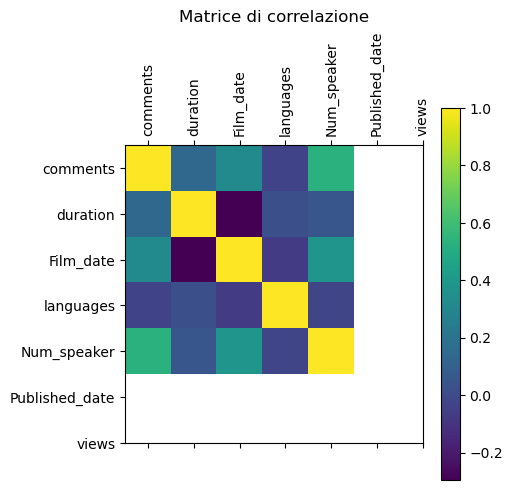

In [27]:
colonnediinteresse=['comments','duration','Film_date','languages','Num_speaker','Published_date','views']
plt.figure(figsize=(15,15))
plt.matshow(Corr_Matrix)
plt.title('Matrice di correlazione')
plt.xticks(range(len(colonnediinteresse)), labels=colonnediinteresse, rotation=90)
plt.yticks(range(len(colonnediinteresse)), labels=colonnediinteresse)
cb=plt.colorbar()
plt.show()

<Axes: >

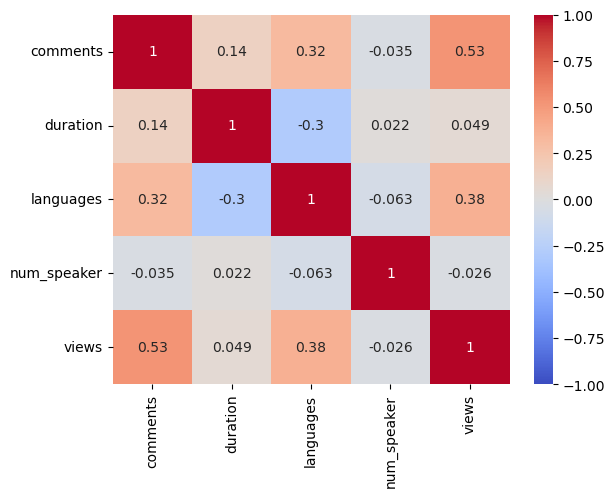

In [28]:
sns.heatmap(df3.corr(method='pearson'), cmap="coolwarm", vmin=-1, vmax=1, annot=True, )

5.Aggiungere una variabile ai dati che contenga il rapporto tra commenti di un presentazione e la durata della presentazione. Plottare la distribuzione di commenti, durata, e il loro rapporto, in tre plot separati. Personalizzate i grafici come ritenete opportuno al fine di migliorarne la leggibilità.

In [29]:
ratio=pd.DataFrame({'RatioComDur':(df['comments'].div(df['duration'])),'title':(df['title'])})

In [30]:
ratio.describe()

,RatioComDur
count,2550.000000
mean,0.268441
std,0.357561
min,0.002759
25%,0.079768
50%,0.158327
75%,0.316036
max,4.402827


In [31]:
TedRatio=pd.merge(df,ratio,on="title")
TedRatio

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views,id,numeric_id,RatioComDur
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110,1,1,3.911512
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520,2,2,0.271238
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,1140739200,26,David Pogue,David Pogue: Simplicity sells,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292,3,3,0.096423
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,1140912000,35,Majora Carter,Majora Carter: Greening the ghetto,1,1151367060,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550,4,4,0.179211
4,593,You've never seen data presented like this. Wi...,1190,TED2006,1140566400,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,1151440680,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869,5,5,0.498319
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2545,17,"Between 2008 and 2016, the United States depor...",476,TED2017,1496707200,4,Duarte Geraldino,Duarte Geraldino: What we're missing in the de...,1,1505851216,"[{'id': 3, 'name': 'Courageous', 'count': 24},...","[{'id': 2596, 'hero': 'https://pe.tedcdn.com/i...",Journalist,"['TED Residency', 'United States', 'community'...",What we're missing in the debate about immigra...,https://www.ted.com/talks/duarte_geraldino_wha...,450430,2546,2546,0.035714
2546,6,How can you study Mars without a spaceship? He...,290,TED2017,1492992000,3,Armando Azua-Bustos,Armando Azua-Bustos: The most Martian place on...,1,1505919737,"[{'id': 22, 'name': 'Fascinating', 'count': 32...","[{'id': 2491, 'hero': 'https://pe.tedcdn.com/i...",Astrobiologist,"['Mars', 'South America', 'TED Fellows', 'astr...",The most Martian place on Earth,https://www.ted.com/talks/armando_azua_bustos_...,417470,2547,2547,0.020690
2547,10,Science fiction visions of the future show us ...,651,TED2017,1492992000,1,Radhika Nagpal,Radhika Nagpal: What intelligent machines can ...,1,1506006095,"[{'id': 1, 'name': 'Beautiful', 'count': 14}, ...","[{'id': 2346, 'hero': 'https://pe.tedcdn.com/i...",Robotics engineer,"['AI', 'ants', 'fish', 'future', 'innovation',...",What intelligent machines can learn from a sch...,https://www.ted.com/talks/radhika_nagpal_what_...,375647,2548,2548,0.015361
2548,32,In an unmissable talk about race and politics ...,1100,TEDxMileHigh,1499472000,1,Theo E.J. Wilson,Theo E.J. Wilson: A black man goes undercover ...,1,1506024042,"[{'id': 11, 'name': 'Longwinded', 'count': 3},...","[{'id': 2512, 'hero':

<function matplotlib.pyplot.show(close=None, block=None)>

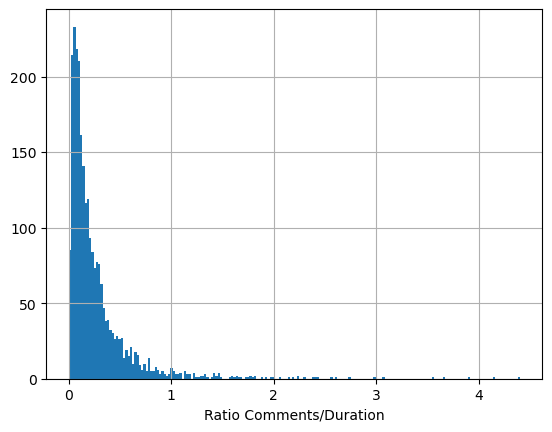

In [32]:
TedRatio['RatioComDur'].hist(bins=200)
plt.ylabel('')
plt.xlabel('Ratio Comments/Duration')
plt.show

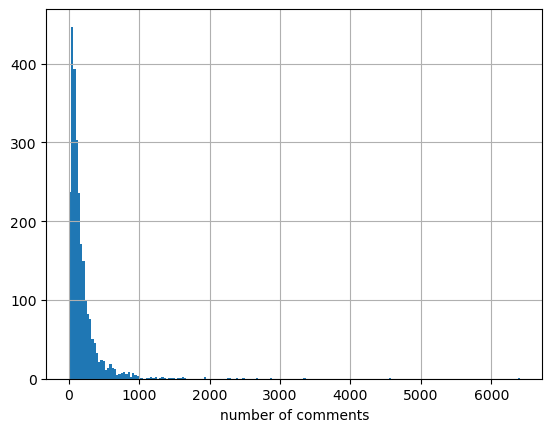

In [33]:
df['comments'].hist(bins=200)
plt.ylabel('')
plt.xlabel('number of comments')
plt.show()

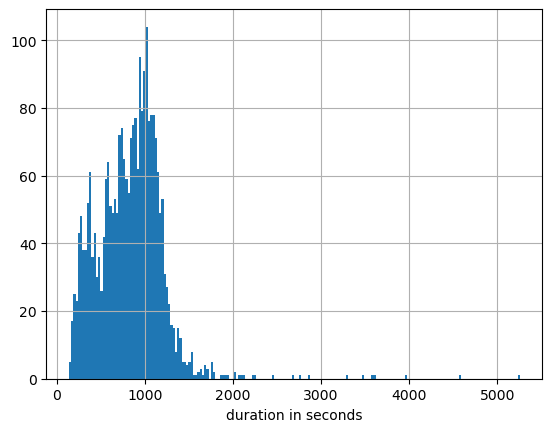

In [34]:
df['duration'].hist(bins=200)
plt.ylabel('')
plt.xlabel('duration in seconds')
plt.show()

6.Quale tipo di occupazione è più rappresentata tra gli speaker? Indicare cioè, il mestiere più frequente.

In [35]:
df['speaker_occupation'].value_counts() #writer + frequente

speaker_occupation
Writer                  45
Artist                  34
Designer                34
Journalist              33
Entrepreneur            31
                        ..
Science author           1
Pro snowboarder          1
Artist, urban farmer     1
Entrepreneur, author     1
 Robotics engineer       1
Name: count, Length: 1458, dtype: int64

7.Per ogni anno, mostrare il numero totale di presentazioni ed il numero totale visualizzazioni. Quale anno ha avuto il maggior numero di visualizzazione per presentazione? Plottare questo rapporto al variare dell’anno.

In [36]:
df.groupby(pd.to_datetime(df["published_date"], unit="s").dt.year)['published_date'].count()

published_date
2006     50
2007    122
2008    188
2009    222
2010    257
2011    261
2012    306
2013    244
2014    240
2015    220
2016    243
2017    197
Name: published_date, dtype: int64

In [37]:
df.groupby(pd.to_datetime(df["published_date"], unit="s").dt.year)['views'].sum()

published_date
2006    206548331
2007    176455861
2008    260270993
2009    342059615
2010    402694421
2011    400499694
2012    489662029
2013    545291823
2014    445515954
2015    420587281
2016    414139074
2017    226933502
Name: views, dtype: int64

In [38]:
from datetime import datetime
lista_date=[]
for x in df['published_date']:
    data= int(x)
    lista_date.append(data)
print(lista_date)




[1151367060, 1151367060, 1151367060, 1151367060, 1151440680, 1151440680, 1152490260, 1152490260, 1153181460, 1153181460, 1153786260, 1153786260, 1153786260, 1154391060, 1154391060, 1154995860, 1154995860, 1155600660, 1155600660, 1156119060, 1156119060, 1156464660, 1156464660, 1157501460, 1157501460, 1158019860, 1158019860, 1158624660, 1158624660, 1159229460, 1159229460, 1159747860, 1159747860, 1160439060, 1160439060, 1161130260, 1161130260, 1161735060, 1161735060, 1162253460, 1162253460, 1162253460, 1162944660, 1162944660, 1163463060, 1163463060, 1165363860, 1166055060, 1166055060, 1166055060, 1167696660, 1167696660, 1168301460, 1168301460, 1168992660, 1168992660, 1170202260, 1170202260, 1170979860, 1170979860, 1171843860, 1171843860, 1172621460, 1175559060, 1175559060, 1175559060, 1175731860, 1175731860, 1175731860, 1175731860, 1175731860, 1175731860, 1175731860, 1175731860, 1175731860, 1175731860, 1175731860, 1175731860, 1175731860, 1175731860, 1175731860, 1175731860, 1175731860, 117

In [39]:
lista_anni=[]
for x in lista_date:
    data_leggibile = datetime.utcfromtimestamp(x).year#.strftime('%Y-%m-%d %H:%M:%S')
    #print(data_leggibile)
    lista_anni.append(data_leggibile)
#serie_anni=pd.Series(lista_anni)
#serie_anni = pd.Series(lista_anni['Valore'], index=lista_anni['Categoria'])
print(lista_anni)
  

[2006, 2006, 2006, 2006, 2006, 2006, 2006, 2006, 2006, 2006, 2006, 2006, 2006, 2006, 2006, 2006, 2006, 2006, 2006, 2006, 2006, 2006, 2006, 2006, 2006, 2006, 2006, 2006, 2006, 2006, 2006, 2006, 2006, 2006, 2006, 2006, 2006, 2006, 2006, 2006, 2006, 2006, 2006, 2006, 2006, 2006, 2006, 2006, 2006, 2006, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 2007, 200

In [40]:
#df['lista_anni']=lista_anni


In [41]:
#df_raggruppato = df.groupby('lista_anni').agg({'views': 'sum'}).reset_index()


In [42]:
#df_raggruppato

In [43]:
#aggregation = df.groupby(lista_anni).agg({'title': 'count', 'views': 'sum'}).reset_index()

In [44]:
#aggregation

In [45]:
ratioViewsCount=(df.groupby(pd.to_datetime(df["published_date"], unit="s").dt.year)['views'].sum())/(df.groupby(pd.to_datetime(df["published_date"], unit="s").dt.year)['published_date'].count())

In [46]:
ratioViewsCount.idxmax() #vedi sotto rifare plot a istogramma

2006

Text(0.5, 0, 'years')

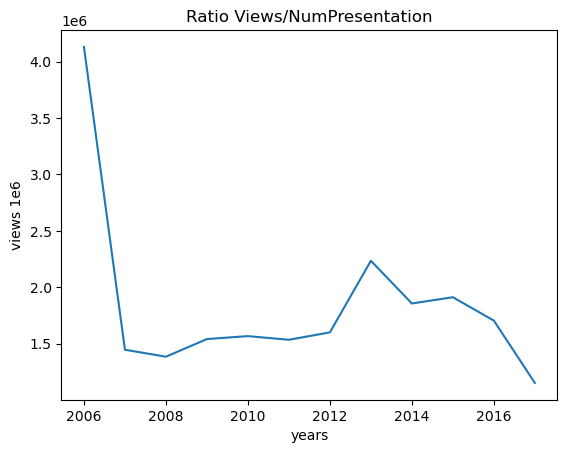

In [47]:
plt.plot(ratioViewsCount)
plt.title('Ratio Views/NumPresentation')
plt.ylabel('views 1e6')
plt.xlabel('years')

8.La variabile ‘ratings’ è particolare: il suo contenuto è un dizionario, che mostra, per ogni presentazione, i sentimenti espressi dagli spettatori. Perciò, ogni chiave del dizionario rappresenta il tipo di reazione (‘Funny’, ‘Courageous’ etc.) e il valore corrispondente rappresenta quante persone hanno espresso quell’emozione. Aprirte tale variabile, con una opportuna funzione o comando, mostrando per ogni presentazione tutti i sentimenti e i rispettivi valori presenti nei rating. Attenzione: non tutte le presentazione avranno tutti i tipi possibili di sentimento nei propri ‘rating’. Se un sentimento non è presente per una certa presentazione, aggiungerlo al dizionario con valore 0.

In [48]:
ratingsdict=df['ratings'].to_dict() ## visualizza tutti i valori per ogni presentazione

In [49]:
from ast import literal_eval


In [50]:
df['sentimentid'] = df['ratings'].apply(lambda x: [d['id'] for d in literal_eval(x)])

In [51]:
listid=[]
for x in df['sentimentid'].sum():
    if x not in listid:
        listid.append(x)
listid

[7, 1, 9, 3, 11, 2, 8, 22, 21, 24, 23, 25, 26, 10]

In [52]:
df['sentimentname'] = df['ratings'].apply(lambda x: [d['name'] for d in literal_eval(x)])

In [53]:
listsent=[]
for x in df['sentimentname'].sum():
    if x not in listsent:
        listsent.append(x)
listsent

['Funny',
 'Beautiful',
 'Ingenious',
 'Courageous',
 'Longwinded',
 'Confusing',
 'Informative',
 'Fascinating',
 'Unconvincing',
 'Persuasive',
 'Jaw-dropping',
 'OK',
 'Obnoxious',
 'Inspiring']

In [54]:
dictsent=dict(zip(listid, listsent))#associo il sentiment al suo id corrispondente
dictsent

{7: 'Funny',
 1: 'Beautiful',
 9: 'Ingenious',
 3: 'Courageous',
 11: 'Longwinded',
 2: 'Confusing',
 8: 'Informative',
 22: 'Fascinating',
 21: 'Unconvincing',
 24: 'Persuasive',
 23: 'Jaw-dropping',
 25: 'OK',
 26: 'Obnoxious',
 10: 'Inspiring'}

In [55]:
listbool=[]
for i in listsent:
    for x in range(len(df['ratings'])):
          bool=i in df['ratings'][x]
          listbool.append(bool)

In [56]:
False in listbool ##Il risultato di questa operazione (False) dimostra che ogni sentiment di rating sono presenti per ogni presentazione

False

In [57]:
def newratings(x):
    dict_id = {}
    for id in listid:
        for d in literal_eval(x['ratings']):
            if d['id'] == id:
                count = d['count']
                break
            else:
                count = d['count']
        dict_id[id,d['name']] = count
 
    return dict_id


df['newratings'] = df.apply(newratings, axis = 1)
#for value in range(len(df)):
#print(df['newratings'][value])


In [58]:
newratingsdict=df['newratings'].to_dict() #questo mi serve nell'esercizio successivo
df.drop(['sentimentname', 'sentimentid'], axis=1, inplace=True) #tolgo le due colonne create prima ma non mi servono più

In [59]:
df

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views,id,numeric_id,newratings
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110,1,1,"{(7, 'Funny'): 19645, (1, 'Beautiful'): 4573, ..."
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520,2,2,"{(7, 'Funny'): 544, (1, 'Beautiful'): 58, (9, ..."
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,1140739200,26,David Pogue,David Pogue: Simplicity sells,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292,3,3,"{(7, 'Funny'): 964, (1, 'Beautiful'): 60, (9, ..."
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,1140912000,35,Majora Carter,Majora Carter: Greening the ghetto,1,1151367060,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550,4,4,"{(7, 'Funny'): 59, (1, 'Beautiful'): 291, (9, ..."
4,593,You've never seen data presented like this. Wi...,1190,TED2006,1140566400,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,1151440680,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869,5,5,"{(7, 'Funny'): 1390, (1, 'Beautiful'): 942, (9..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2545,17,"Between 2008 and 2016, the United States depor...",476,TED2017,1496707200,4,Duarte Geraldino,Duarte Geraldino: What we're missing in the de...,1,1505851216,"[{'id': 3, 'name': 'Courageous', 'count': 24},...","[{'id': 2596, 'hero': 'https://pe.tedcdn.com/i...",Journalist,"['TED Residency', 'United States', 'community'...",What we're missing in the debate about immigra...,https://www.ted.com/talks/duarte_geraldino_wha...,450430,2546,2546,"{(7, 'Funny'): 1, (1, 'Beautiful'): 21, (9, 'I..."
2546,6,How can you study Mars without a spaceship? He...,290,TED2017,1492992000,3,Armando Azua-Bustos,Armando Azua-Bustos: The most Martian place on...,1,1505919737,"[{'id': 22, 'name': 'Fascinating', 'count': 32...","[{'id': 2491, 'hero': 'https://pe.tedcdn.com/i...",Astrobiologist,"['Mars', 'South America', 'TED Fellows', 'astr...",The most Martian place on Earth,https://www.ted.com/talks/armando_azua_bustos_...,417470,2547,2547,"{(7, 'Funny'): 20, (1, 'Beautiful'): 4, (9, 'I..."
2547,10,Science fiction visions of the future show us ...,651,TED2017,1492992000,1,Radhika Nagpal,Radhika Nagpal: What intelligent machines can ...,1,1506006095,"[{'id': 1, 'name': 'Beautiful', 'count': 14}, ...","[{'id': 2346, 'hero': 'https://pe.tedcdn.com/i...",Robotics engineer,"['AI', 'ants', 'fish', 'future', 'innovation',...",What intelligent machines can learn from a sch...,https://www.ted.com

9.Creare un nuovo dataframe separato. In tale dataframe inserire l’identificativo numerico di ogni presentazione. In questo nuovo dataframe inserire, come variabili i sentimenti espressi nei rating corrispondenti. Tali variabili avranno come valori il numero espresso nella variabile ‘rating’ originale. Usate l’identificativo per associare correttamente. Una volta terminato, mostrare tutte le informazioni statistiche di base per questo nuovo dataframe.

In [60]:
numeric_id=pd.DataFrame({'numeric_id':df['numeric_id']}, index=range(len(df)))
numeric_id

,numeric_id
0,1
1,2
2,3
3,4
4,5
...,...
2545,2546
2546,2547
2547,2548
2548,2549


In [61]:
dfsent=pd.DataFrame.from_dict(newratingsdict,orient='index')
dfsent

,7,1,9,3,11,2,8,22,21,24,23,25,26,10
,Funny,Beautiful,Ingenious,Courageous,Longwinded,Confusing,Informative,Fascinating,Unconvincing,Persuasive,Jaw-dropping,OK,Obnoxious,Inspiring
0,19645,4573,6073,3253,387,242,7346,10581,300,10704,4439,1174,209,24924
1,544,58,56,139,113,62,443,132,258,268,116,203,131,413
2,964,60,183,45,78,27,395,166,104,230,54,146,142,230
3,59,291,105,760,53,32,380,132,36,460,230,85,35,1070
4,1390,942,3202,318,110,72,5433,4606,67,2542,3736,248,61,2893
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2545,1,21,22,24,3,2,33,8,12,24,14,0,1,27
2546,20,4,6,2,0,0,38,32,1,7,8,13,0,20
2547,1,14,19,2,0,5,32,24,1,3,1,4,0,30


In [62]:
Newdfid=numeric_id.join(dfsent.droplevel(1,axis=1))
Newdfnames=numeric_id.join(dfsent.droplevel(0,axis=1))
Newdfid
##Ho provato a fondere i due livelli per averne uno unico 
##così da non perdere informazioni, ma non sono riuscita quindi 
##quindi ho lasciato l'identificativo. Esiste un metodo per avere colonne
## 7_funny su un solo livello?

,numeric_id,7,1,9,3,11,2,8,22,21,24,23,25,26,10
0,1,19645,4573,6073,3253,387,242,7346,10581,300,10704,4439,1174,209,24924
1,2,544,58,56,139,113,62,443,132,258,268,116,203,131,413
2,3,964,60,183,45,78,27,395,166,104,230,54,146,142,230
3,4,59,291,105,760,53,32,380,132,36,460,230,85,35,1070
4,5,1390,942,3202,318,110,72,5433,4606,67,2542,3736,248,61,2893
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2545,2546,1,21,22,24,3,2,33,8,12,24,14,0,1,27
2546,2547,20,4,6,2,0,0,38,32,1,7,8,13,0,20
2547,2548,1,14,19,2,0,5,32,24,1,3,1,4,0,30
2548,2549,63,21,37,107,3,1,75,39,6,65,7,5,7,147


In [63]:
Newdfid.describe()

,numeric_id,7,1,9,3,11,2,8,22,21,24,23,25,26,10
count,2550.000000,2550.000000,2550.000000,2550.000000,2550.000000,2550.000000,2550.000000,2550.000000,2550.000000,2550.000000,2550.000000,2550.000000,2550.000000,2550.000000,2550.000000
mean,1275.500000,154.468627,192.293725,150.739608,164.723529,32.683922,20.955294,348.013333,314.164314,52.767843,220.086275,148.057647,81.238039,26.001176,530.214902
std,736.265917,589.137728,477.375664,283.800437,433.805453,41.608618,31.552561,540.225980,624.535809,91.678632,466.774759,553.879757,90.321214,53.443249,1314.509665
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
25%,638.250000,8.000000,26.000000,26.000000,20.000000,9.000000,5.000000,99.250000,79.000000,12.000000,37.000000,18.250000,32.000000,6.000000,113.000000
50%,1275.500000,21.000000,68.000000,69.000000,51.000000,19.000000,12.000000,212.000000,162.000000,27.000000,97.000000,42.000000,55.500000,13.000000,233.500000
75%,1912.750000,92.000000,190.750000,170.750000,149.000000,41.000000,24.000000,401.000000,344.000000,60.000000,225.750000,110.750000,99.000000,27.000000,497.750000
max,2550.000000,19645.000000,9437.000000,6073.000000,8668.000000,447.000000,531.000000,9787.000000,14447.000000,2194.000000,10704.000000,14728.000000,1341.000000,1361.000000,24924.000000


In [64]:
#10.Infine unire il nuovo dataframe di rating all’originale con una operazione di join o merge.
#df_completo = pd.merge(df1, df2, on='ID')

In [65]:
Finaldf=pd.merge(Newdfid,df, on='numeric_id')
pd.set_option('display.max_columns', None)
Finaldf.drop(['newratings'], axis=1, inplace=True)

In [66]:
Finaldf

,numeric_id,7,1,9,3,11,2,8,22,21,24,23,25,26,10,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views,id
0,1,19645,4573,6073,3253,387,242,7346,10581,300,10704,4439,1174,209,24924,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110,1
1,2,544,58,56,139,113,62,443,132,258,268,116,203,131,413,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520,2
2,3,964,60,183,45,78,27,395,166,104,230,54,146,142,230,124,New York Times columnist David Pogue takes aim...,1286,TED2006,1140739200,26,David Pogue,David Pogue: Simplicity sells,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292,3
3,4,59,291,105,760,53,32,380,132,36,460,230,85,35,1070,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,1140912000,35,Majora Carter,Majora Carter: Greening the ghetto,1,1151367060,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550,4
4,5,1390,942,3202,318,110,72,5433,4606,67,2542,3736,248,61,2893,593,You've never seen data presented like this. Wi...,1190,TED2006,1140566400,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,1151440680,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2545,2546,1,21,22,24,3,2,33,8,12,24,14,0,1,27,17,"Between 2008 and 2016, the United States depor...",476,TED2017,1496707200,4,Duarte Geraldino,Duarte Geraldino: What we're missing in the de...,1,1505851216,"[{'id': 3, 'name': 'Courageous', 'count': 24},...","[{'id': 2596, 'hero': 'https://pe.tedcdn.com/i...",Journalist,"['TED Residency', 'United States', 'community'...",What we're missing in the debate about immigra...,https://www.ted.com/talks/duarte_geraldino_wha...,450430,2546
2546,2547,20,4,6,2,0,0,38,32,1,7,8,13,0,20,6,How can you study Mars without a spaceship? He...,290,TED2017,1492992000,3,Armando Azua-Bustos,Armando Azua-Bustos: The most Martian place on...,1,1505919737,"[{'id': 22, 'name': 'Fascinating', 'count': 32...","[{'id': 2491, 'hero': 'https://pe.tedcdn.com/i...",Astrobiologist,"['Mars', 'South America', 'TED Fellows', 'astr...",The most Martian place on Earth,https://www.ted.com/talks/armando_azua_bustos_...,417470,2547
2547,2548,1,14,19,2,0,5,32,24,1,3,1,4,0,30,10,Science fiction visions of the future show us ...,651,TED2017,1492992000,1,Radhika Nagpal,Radhika Nagpal: What intelligent machines can ...,1,1506006095,"[{'id': 1, 'name': 'Beautiful', 'count': 14}, ...","[{'id': 2346, 'hero': 'https://pe.tedcdn.com/i...",Robotics engineer,"['AI', 'ants', 